# Convolutional Neural Network Implementation in TensorFlow 2.0

![Convolutional Neural Network Architecture](https://miro.medium.com/max/2510/1*vkQ0hXDaQv57sALXAJquxA.jpeg)

**About the dataset**



Let us implement a simple convolutional neural network using TensorFlow 2.0. For this, we will make use of the Fashion MNIST dataset by Zalando (MIT License) which contains 70,000 images (in grayscale) in 10 different categories. The images are 28x28 pixels of individual articles of clothing with values ranging from 0 to 255 as shown below:

![Fashion MNIST dataset](https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)

Out of the total 70,000 images, 60,000 are used for training and remaining 10,000 for testing. The labels are integer arrays ranging from 0 to 9. The class names are not a part of the dataset and hence we need to include the below mapping while training/prediction:

Label	-> Description

0	-> T-shirt/top

1	-> Trouser

2	-> Pullover

3	-> Dress

4	-> Coat

5	-> Sandal

6	-> Shirt

7	-> Sneaker

8	-> Bag

9	-> Ankle boot


In [1]:
# Create class_names list object for mapping labels to names

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [2]:
# Use the below code to make sure that you select TensorFlow 2.0 in Colab
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [3]:
# Install necessary modules

from __future__ import absolute_import, division, print_function, unicode_literals

# Helper libraries
import numpy as np

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras as ks

# Validating the TensorFlow version
print(tf.__version__)

2.3.0


In [4]:
# Load the Fashion MNIST dataset

mnist_fashion = ks.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist_fashion.load_data()

4423680/4422102 [==============================] - 0s 0us/step


**Data Exploration**

In [5]:
# Shape of Training and Test Set

print('Training Dataset Shape: {}'.format(training_images.shape))
print('No. of Training Dataset Labels: {}'.format(len(training_labels)))
print('Test Dataset Shape: {}'.format(test_images.shape))
print('No. of Test Dataset Labels: {}'.format(len(test_labels)))

Training Dataset Shape: (60000, 28, 28)
No. of Training Dataset Labels: 60000
Test Dataset Shape: (10000, 28, 28)
No. of Test Dataset Labels: 10000


**Data Preprocessing**

As the pixel values range from 0 to 255, we have to scale these values to a range of 0 to 1 before feeding them to the model. We can scale these values (both for training and test datasets) by dividing the values by 255:

In [6]:
training_images = training_images / 255.0

test_images = test_images / 255.0

Reshaping the Training and Test dataset by reshaping the matrices into 28x28x1 array: 

In [7]:
training_images = training_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [8]:
# Shape of Training and Test Set after applying reshape

print('Training Dataset Shape: {}'.format(training_images.shape))
print('No. of Training Dataset Labels: {}'.format(len(training_labels)))
print('Test Dataset Shape: {}'.format(test_images.shape))
print('No. of Test Dataset Labels: {}'.format(len(test_labels)))

Training Dataset Shape: (60000, 28, 28, 1)
No. of Training Dataset Labels: 60000
Test Dataset Shape: (10000, 28, 28, 1)
No. of Test Dataset Labels: 10000


In [9]:
type(training_images)

numpy.ndarray

**Model Building**

We will be using the keras implementation to build the different layers of a CNN. We will keep it simple by having only 2 layers. 

**First Layer - Convolutional layer with ReLU activation function:** This layer takes the 2D array (28x28 pixels) as input. We will take 50 convolutional kernels (filters) of shape 3x3 pixels, output of whose will be passed to a ReLU activation function before it is passed to the next layer.

In [10]:
cnn_model = ks.models.Sequential()
cnn_model.add(ks.layers.Conv2D(40, (3, 3), activation='relu', input_shape=(28, 28, 1), 
                               name='Convolutional_layer'))

**Second Layer - Pooling layer:** This layer takes the 50 26x26 2D arrays as input and transforms them into the same number (50) of arrays with dimensions half of that of the original (i.e. from 26x26 to 13x13 pixels)

In [11]:
cnn_model.add(ks.layers.MaxPooling2D((2, 2), name='Maxpooling_2D'))

**Third Layer - Fully Connected layer:** This layer takes the 50 13x13 2D arrays as input and transforms them into a 1D array of 8450 elements (50x13x13). These 8450 input elements are passed through a fully connected neural network which gives out the probability scores for each of the 10 output labels (at the output layer)

In [12]:
cnn_model.add(ks.layers.Flatten(name='Flatten'))
cnn_model.add(ks.layers.Dense(50, activation='relu', name='Hidden_layer'))
cnn_model.add(ks.layers.Dense(10, activation='softmax', name='Output_layer'))

We can check the details of different layers built in the CNN model by using the summary method as shown below:

In [13]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Convolutional_layer (Conv2D) (None, 26, 26, 40)        400       
_________________________________________________________________
Maxpooling_2D (MaxPooling2D) (None, 13, 13, 40)        0         
_________________________________________________________________
Flatten (Flatten)            (None, 6760)              0         
_________________________________________________________________
Hidden_layer (Dense)         (None, 50)                338050    
_________________________________________________________________
Output_layer (Dense)         (None, 10)                510       
Total params: 338,960
Trainable params: 338,960
Non-trainable params: 0
_________________________________________________________________


Now, we will use an optimization function with the help of compile method. An Adam optimizer with objective function as sparse_categorical_crossentropy which optimzes for the accuracy metric can be built as follows:

In [14]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

**Model Training**

In [15]:
cnn_model.fit(training_images, training_labels, epochs=10)
# CPU: 34 s / epoch, GPU: 3s /epoch

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4342 - accuracy: 0.8476
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2927 - accuracy: 0.8952
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2510 - accuracy: 0.9099
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2238 - accuracy: 0.9189
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1988 - accuracy: 0.9274
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1805 - accuracy: 0.9342
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1625 - accuracy: 0.9406
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1462 - accuracy: 0.9466
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1326 - accuracy: 0.9510
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.119

**Model Evaluation**

1. Training Evaluation

In [16]:
training_loss, training_accuracy = cnn_model.evaluate(training_images, training_labels)

print('Training Accuracy {}'.format(round(float(training_accuracy), 2)))

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0992 - accuracy: 0.9645
Training Accuracy 0.96


2. Test Evaluation

In [17]:
test_loss, test_accuracy = cnn_model.evaluate(test_images, test_labels)

print('Test Accuracy {}'.format(round(float(test_accuracy), 2)))

313/313 [==============================] - 1s 2ms/step - loss: 0.2973 - accuracy: 0.9102
Test Accuracy 0.91


From the above evaluation, we see that we were able to achieve around 97% accuracy in Training dataset and around 91% accuracy in Test dataset just with a simple CNN architecture. This goes on to prove that CNNs are powerful algorithms for Image recognition.

# CNN_VAE

## Variational Autoencoders

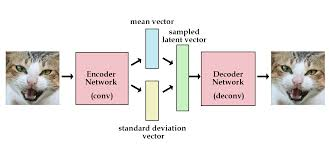

In [ ]:
!pip install imageio

## Step 1: Load the required python modules




In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import os
import time
import numpy as np
import glob
import matplotlib.pyplot as plt
import PIL
import imageio

from IPython import display

## Step 2: Load the MNIST dataset with train-test split, Normalization and Binarization




In [2]:
(train_data, _), (test_data, _) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
(train_data, _), (test_data, _) = tf.keras.datasets.mnist.load_data()
train_data = train_data.reshape(train_data.shape[0], 28, 28, 1).astype('float32')
test_data = test_data.reshape(test_data.shape[0], 28, 28, 1).astype('float32')
# Input Image Normalization to the range of [0,1]
train_data /= 255.
test_data /= 255.
# Binarization of the Normalized Output
train_data[train_data >= .5] = 1.
train_data[train_data < .5] = 0.
test_data[test_data >= .5] = 1.
test_data[test_data < .5] = 0.


## Step 3: Batching and Shuffling the dataset

In [4]:
TRAIN_SIZE = 60000
BATCH_SIZE = 50
TEST_SIZE = 10000
train_batch = tf.data.Dataset.from_tensor_slices(train_data).shuffle(TRAIN_SIZE).batch(BATCH_SIZE)
test_batch = tf.data.Dataset.from_tensor_slices(test_data).shuffle(TEST_SIZE).batch(BATCH_SIZE)

## Step 4: Use tf.keras.Sequential to build the Encoder and Decoder

### We will be building two Convolutional Neural Networks for the Encoder and Decoder wrapping with tf.keras.Sequential. 

In [5]:
class CONV_VAE(tf.keras.Model):
  def __init__(self, latent_dim):
    super(CONV_VAE, self).__init__()
    self.latent_vec = latent_vec
    self.encoder_model = tf.keras.Sequential(
      [
          tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
          tf.keras.layers.Conv2D(
              filters=25, kernel_size=3, strides=(2, 2), activation='relu'),
          tf.keras.layers.Conv2D(
              filters=50, kernel_size=3, strides=(2, 2), activation='relu'),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(latent_vec + latent_vec),
      ]
    )

    self.decoder_model = tf.keras.Sequential(
        [
          tf.keras.layers.InputLayer(input_shape=(latent_vec,)),
          tf.keras.layers.Dense(units=7*7*25, activation=tf.nn.relu),
          tf.keras.layers.Reshape(target_shape=(7, 7, 25)),
          tf.keras.layers.Conv2DTranspose(
              filters=50,
              kernel_size=3,
              strides=(2, 2),
              padding="SAME",
              activation='relu'),
          tf.keras.layers.Conv2DTranspose(
              filters=25,
              kernel_size=3,
              strides=(2, 2),
              padding="SAME",
              activation='relu'),
          tf.keras.layers.Conv2DTranspose(
              filters=1, kernel_size=3, strides=(1, 1), padding="SAME"),
        ]
    )

  @tf.function
  def sampling(self, sam=None):
    if sam is None:
      sam = tf.random.normal(shape=(50, self.latent_vec))
    return self.decoder(sam, apply_sigmoid=True)

  def encoder(self, inp):
    mean, logd = tf.split(self.encoder_model(inp), num_or_size_splits=2, axis=1)
    return mean, logd

  def reparameterization(self, mean, logd):
    sam = tf.random.normal(shape=mean.shape)
    return sam * tf.exp(logd * .5) + mean

  def decoder(self, out, apply_sigmoid=False):
    logout = self.decoder_model(out)
    if apply_sigmoid:
      probabs = tf.sigmoid(logout)
      return probabs

    return logout

## Step 5: Build an Optimizer Function

In [6]:
optimizer_func = tf.keras.optimizers.Adam(1e-4)

def log_normal_prob_dist_func(sample, mean, logd, raxis=1):
  log2pi = tf.math.log(2. * np.pi)
  return tf.reduce_sum(-.5 * ((sample - mean) ** 2. * tf.exp(-logd) + logd + log2pi), axis=raxis)

@tf.function
def loss_func(model, inp):
  mean, logd = model.encoder(inp)
  out = model.reparameterization(mean, logd)
  log_inp = model.decoder(out)
  cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=log_inp, labels=inp)
  logp_inp_out = -tf.reduce_sum(cross_entropy, axis=[1, 2, 3])
  logp_out = log_normal_prob_dist_func(out, 0., 0.)
  logq_out_inp = log_normal_prob_dist_func(out, mean, logd)
  return -tf.reduce_mean(logp_inp_out + logp_out - logq_out_inp)

@tf.function
def gradient_func(model, inp, optimizer_func):
  with tf.GradientTape() as tape:
    loss = loss_func(model, inp)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer_func.apply_gradients(zip(gradients, model.trainable_variables))

## Step 6: Training

In [7]:
epochs = 100
latent_vec = 8
examples = 8

rand_vec = tf.random.normal(
    shape=[examples, latent_vec])
model = CONV_VAE(latent_vec)

## Step 7: Generate Image with trained model

In [8]:
def generate_and_save_images(model, epochs, input_data):
  preds = model.sampling(input_data)
  fig = plt.figure(figsize=(4,4))

  for i in range(preds.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(preds[i, :, :, 0], cmap='gray')
      plt.axis('off')

  plt.savefig('img_at_epoch{:04d}.png'.format(epochs))
  plt.show()

Epoch no.: 100, Test batch ELBO: -99.62580108642578, elapsed time for current epoch 73.45659399032593


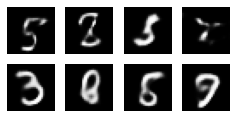

KeyboardInterrupt: ignored

In [9]:
generate_and_save_images(model, 0, rand_vec)

for epoch in range(1, epochs + 1):
  start_time = time.time()
  for x in train_batch:
    gradient_func(model, x, optimizer_func)
  end_time = time.time()

  if epoch % 1 == 0:
    loss = tf.keras.metrics.Mean()
    for y in test_batch:
      loss(loss_func(model, y))
    elbo = -loss.result()
    display.clear_output(wait=False)
    print('Epoch no.: {}, Test batch ELBO: {}, '
          'elapsed time for current epoch {}'.format(epochs, elbo, end_time - start_time))
    generate_and_save_images(model, epochs, rand_vec)

## Step 8: View one of the generated Images

In [10]:
def display_image(epoch_no):
  return PIL.Image.open('img_at_epoch{:04d}.png'.format(epoch_no))

(-0.5, 287.5, 287.5, -0.5)

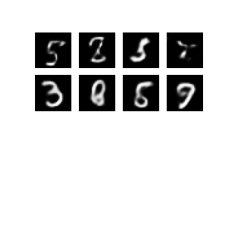

In [11]:
plt.imshow(display_image(epochs))
plt.axis('off')# Display images